# Lab: Pokémon Data Classification

## Objective
This notebook demonstrates how to classify Pokémon as legendary or not using two machine learning models:
- Logistic Regression
- Multi-Layer Perceptron (MLP)

We will compare the performance of both models using metrics such as accuracy, precision, recall, F1-score, and AUC-ROC.

## Step 1: Load and Explore the Dataset

In [558]:
# Your import 
#snagged from linear-regression
import glob
glob.glob('*.csv')
import pandas as pd
import numpy as np

# Load the Pokémon dataset
pokemon_data = pd.read_csv('pokemon.csv')

# Display the first few rows
pokemon_data.head(5)

,name,deck_no,attack,defense,sp_attack,sp_defense,speed,capture_rt,total_bs,type,gen,legendary
0,Bulbasaur,1,49,49,65,65,45,45,318,grass,1,0
1,Ivysaur,2,62,63,80,80,60,45,405,grass,1,0
2,Venusaur,3,100,123,122,120,80,45,625,grass,1,0
3,Charmander,4,52,43,60,50,65,45,309,fire,1,0
4,Charmeleon,5,64,58,80,65,80,45,405,fire,1,0


## Step 2: Data Preprocessing
### 2.1 Feature Engineering

### <span style="color:red">Please create a derived feature: sp_attack_to_sp_defense_ratio, Target is Legendary</span>. 

In [560]:
# Create a derived feature: sp_attack_to_sp_defense_ratio

# your code
pokemon_data['sp_attack_to_sp_defense_ratio'] = pokemon_data['sp_attack']/pokemon_data['defense']

# Select all features + derived  
# target: Legendary 
# Your code
features = ['attack', 'defense', 'sp_attack', 'sp_defense',	
            'speed', 'capture_rt', 'total_bs', 'type', 
            'sp_attack_to_sp_defense_ratio']
target = 'legendary'

X = pokemon_data[features]
y = pokemon_data[target] 

#X
#y
print("bonk" , y)


bonk 0      0
1      0
2      0
3      0
4      0
      ..
796    1
797    1
798    1
799    1
800    1
Name: legendary, Length: 801, dtype: int64


### 2.2 Data Transformation Using ColumnTransformer

In [562]:
categorical_features = ['type']
print(categorical_features)
numeric_features = [col for col in features if col not in categorical_features]
numeric_features

['type']


['attack',
 'defense',
 'sp_attack',
 'sp_defense',
 'speed',
 'capture_rt',
 'total_bs',
 'sp_attack_to_sp_defense_ratio']

In [563]:
# Your import 
#grab data processing tools from sklearn
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler, Normalizer, MaxAbsScaler

# Categorical and numerical columns
# your code
caregorical_features = ['type']
numeric_features = [col for col in features if col not in categorical_features]

# Preprocessing pipeline
# please choose one suitable method as your scaling method
# please use OneHot as your Encoder
# Your code
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder()

preprocessor = ColumnTransformer (
    transformers = [
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

#print(caregorical_features)
#print(numeric_features)
#print(preprocessor)
preprocessor

ColumnTransformer(transformers=[('num', StandardScaler(),
                                 ['attack', 'defense', 'sp_attack',
                                  'sp_defense', 'speed', 'capture_rt',
                                  'total_bs',
                                  'sp_attack_to_sp_defense_ratio']),
                                ('cat', OneHotEncoder(), ['type'])])

### Prepare the training data

In [565]:
from sklearn.model_selection import train_test_split

# Transform the data
X_transformed = preprocessor.fit_transform(X)

# Train-test split
# Step 1: First train-test split to create training and temporary sets
# X_transformed: Preprocessed feature data
# y: Target labels
# test_size=0.3: Reserve 30% of the data for validation and test sets
# random_state=42: Ensures reproducibility of the splits
# stratify=y: Maintains the class distribution in the split

#Your code
X_train, X_temp, y_train, y_temp = train_test_split(
    X_transformed, y, test_size=0.3, random_state=42, stratify=y)

print(X_temp)
print(X_temp.shape)

[[ 1.46683792 -0.42304916  0.73280163 ...  0.          0.
   0.        ]
 [ 0.34669443  0.38996038 -0.50430065 ...  0.          0.
   0.        ]
 [ 0.06665856 -0.58565107 -1.43212736 ...  0.          0.
   0.        ]
 ...
 [-0.02668673 -0.42304916  0.79465674 ...  0.          0.
   0.        ]
 [-0.86679434  0.8777661   0.73280163 ...  0.          0.
   1.        ]
 [ 1.00011146  0.22735847  0.88743941 ...  0.          0.
   0.        ]]
(241, 26)


In [566]:
# Your import 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.metrics import accuracy_score



# Please use train_test_split to prepare your data


# Your code
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)


X_train[:2], X_test[:2]

(array([[-0.40006789, -0.26044725, -0.968214  , -1.10700876, -1.77001294,
          1.19130465, -0.9517153 , -0.73205986,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          1.        ],
        [ 0.19111895, -0.09784534, -0.19502508, -0.03220389, -0.52510226,
         -0.70940526, -0.1542614 , -0.26358357,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
          0.        ]]),
 array([[ 0.53338501,  0.38996038,  1.19671498,  0.86346683,  0.44316161,
         -0.70940526,  0.89502004,  0.28321383,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,  0.

## Step 3: Logistic Regression

In [568]:

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.metrics import accuracy_score

# Please build your Logistic Regression model
logistic_model = LogisticRegression(max_iter=500, random_state=42)
logistic_model.fit(X_train, y_train)




# Train Logistic Regression
y_val_prob_logistic = logistic_model.predict_proba(X_val)[:,1]
auc_val_logistic = roc_auc_score(y_val, y_val_prob_logistic)






# Please use AUC and accuracy score to evaluate your model
# By trying different methods, your accuracy can reach over 90%.
y_val_pred_logistic = logistic_model.predict(X_val)
accuracy_score_logistic = accuracy_score(y_val, y_val_pred_logistic)





print("Ian Nelson + Logistic Regression - Validation Performance:")
print(classification_report(y_val, y_val_pred_logistic))
print(f"Validation AUC: {auc_val_logistic:.4f}")
print(f"Validation accuracy: {accuracy_score_logistic:.4f}")

Ian Nelson + Logistic Regression - Validation Performance:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       110
           1       0.83      1.00      0.91        10

    accuracy                           0.98       120
   macro avg       0.92      0.99      0.95       120
weighted avg       0.99      0.98      0.98       120

Validation AUC: 0.9918
Validation accuracy: 0.9833


## Step 4: Multi-Layer Perceptron (MLP)

In [570]:
from sklearn.neural_network import MLPClassifier

# Please build your Multi-Layer Perceptron model

print(X_train.shape)
print(X_train)
# Hidden layer: 8 weights and 4 biases, activation: relu, iteration : 500
# Your code
mlp_model = MLPClassifier(hidden_layer_sizes=(8,4), activation = 'relu', max_iter=500, random_state=42)
mlp_model.fit(X_train, y_train)

# Please use AUC and accuracy score to evalue your model
# By trying different methods, your accuracy can reach over 90%.
# Your code





# Train MLP Classifier
y_val_pred_mlp = mlp_model.predict(X_val)
y_val_prob_mlp = mlp_model.predict_proba(X_val)[:, 1]

# Evaluate MLP Classifier
accuracy_score_mlp = accuracy_score(y_val, y_val_pred_mlp)
auc_val_mlp = roc_auc_score(y_val, y_val_prob_mlp)

print("<Your name> + MLP Classifier - Validation Performance:")
print(classification_report(y_val, y_val_pred_mlp))
print(f"Validation AUC: {auc_val_mlp:.4f}")
print(f"Validation accuracy: {accuracy_score_mlp:.4f}")

(560, 26)
[[-0.40006789 -0.26044725 -0.968214   ...  0.          0.
   1.        ]
 [ 0.19111895 -0.09784534 -0.19502508 ...  1.          0.
   0.        ]
 [-0.86679434 -0.74825297  0.45445361 ...  0.          0.
   0.        ]
 ...
 [ 0.6889605   1.69077564  1.19671498 ...  0.          0.
   0.        ]
 [ 0.22223404 -0.74825297 -0.968214   ...  0.          0.
   0.        ]
 [ 0.22223404 -0.91085488 -1.12285179 ...  0.          0.
   0.        ]]
<Your name> + MLP Classifier - Validation Performance:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       110
           1       0.82      0.90      0.86        10

    accuracy                           0.97       120
   macro avg       0.90      0.94      0.92       120
weighted avg       0.98      0.97      0.98       120

Validation AUC: 0.9891
Validation accuracy: 0.9750


C:\Users\iann\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


## Step 5: Comparison of Models - Training Loss Curve

### Manually record the loss of logistic regression

In [573]:
import matplotlib.pyplot as plt
from sklearn.metrics import log_loss
# Please record your loss of logistic regression with 500 iterations
# Your code


# Initialize the model with warm_start to fit incrementally
logistic_model = LogisticRegression(
    max_iter=1,
    solver='saga',
    random_state=42,
    warm_start=True
)


# To store the loss values
loss_curve = []

# Train the model incrementally
# Your code
for i in range(1, 501):
    logistic_model.fit(X_train, y_train)
    y_train_prob = logistic_model.predict_proba(X_train)
    loss = log_loss(y_train, y_train_prob)
    loss_curve.append(loss)



C:\Users\iann\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\iann\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\iann\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\iann\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\iann\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\iann\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was re

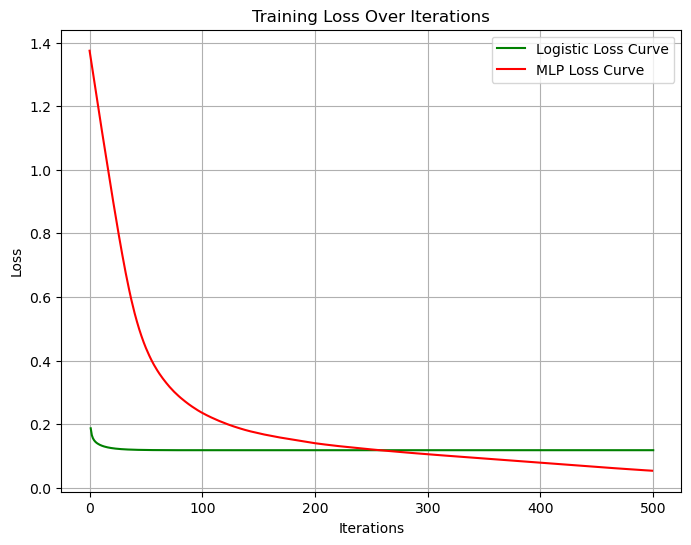

In [574]:
# Extract loss during MLP training
# Your code
mlp_model_loss_curve = mlp_model.loss_curve_
Logic_loss = loss_curve

# Plot the loss difference during MLP training and Logistic
# please set color of Logistic as green, set MLP as red.
# Your code
plt.figure(figsize=(8,6))
plt.plot(range(1, len(Logic_loss) + 1), Logic_loss, label="Logistic Loss Curve", color='green')
plt.plot(mlp_model_loss_curve, label="MLP Loss Curve", color='red')
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("Training Loss Over Iterations")
plt.grid()
plt.legend()
plt.show()



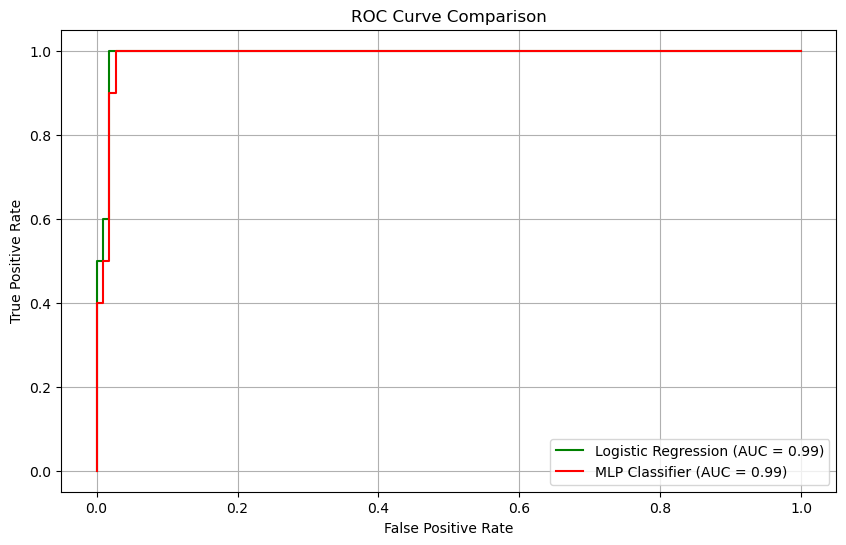

In [575]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
# Plot ROC Curve Comparison


# Plot ROC curves
# Your code 
fpr_logistic, tpr_logistic, _ = roc_curve(y_val, y_val_prob_logistic)
fpr_mlp, tpr_mlp, _ = roc_curve(y_val, y_val_prob_mlp)
 
# please set color of Logistic as green, set MLP as red.
# Your code 
plt.figure(figsize=(10,6))
plt.plot(fpr_logistic, tpr_logistic, label=f"Logistic Regression (AUC = {auc_val_logistic:.2f})", color='green')
plt.plot(fpr_mlp, tpr_mlp, label=f"MLP Classifier (AUC = {auc_val_mlp:.2f})", color='red')
plt.title("ROC Curve Comparison")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.grid()
plt.legend(loc="lower right")
plt.show()

In [576]:
# Your idea:



## Step 6: Visualization of Predictions and Confusion Matrices

### 6.1 Actual vs Predicted Results

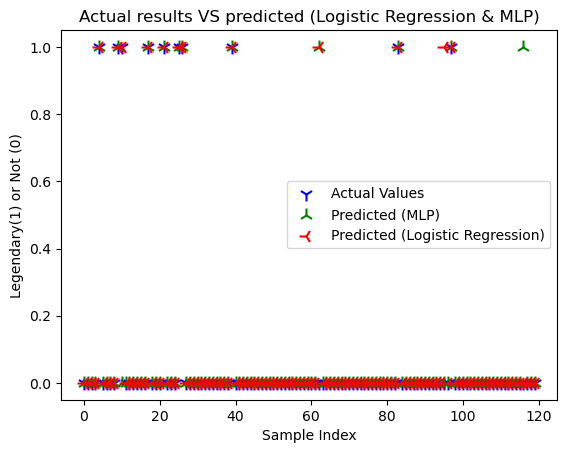

In [639]:
# Please plot the Actual data and Predicted for Logistic and MLP model
# Your code
#i changed the markers so layerd data can be seen 
plt.scatter(range(len(y_val)), y_val, color='blue', alpha=1, label="Actual Values", s=100, marker="1")
plt.scatter(range(len(y_val)), y_val_pred_mlp, color='green', alpha=1, label="Predicted (MLP)", s=100, marker='2')
plt.scatter(range(len(y_val)), y_val_pred_logistic, color='red', alpha=1, label="Predicted (Logistic Regression)", s=100, marker='3')

plt.title("Actual results VS predicted (Logistic Regression & MLP)")
plt.xlabel("Sample Index")
plt.ylabel("Legendary(1) or Not (0)")
plt.legend()
plt.show()


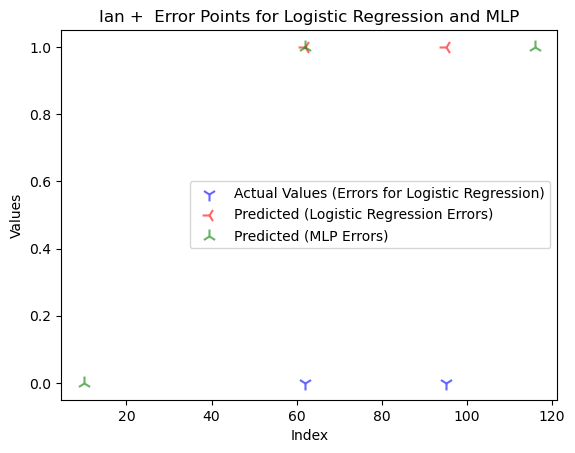

In [605]:
import matplotlib.pyplot as plt

# Identify error indices for Logistic Regression
errors_logistic = (y_val != y_val_pred_logistic)

# Identify error indices for MLP
errors_mlp = (y_val != y_val_pred_mlp)

# Plot the actual values at error indices
plt.scatter(
    np.where(errors_logistic)[0],  # Indices of errors for Logistic Regression
    y_val[errors_logistic],  # Actual values where Logistic Regression fails
    color='blue', alpha=0.6, label="Actual Values (Errors for Logistic Regression)", s=100, marker="1"
)

# # Plot the Logistic Regression predictions at error indices
plt.scatter(
    np.where(errors_logistic)[0],  # Indices of errors for Logistic Regression
    y_val_pred_logistic[errors_logistic],  # Predicted values where errors occur
    color='red', alpha=0.6, label="Predicted (Logistic Regression Errors)", s=100, marker="3"
)

# # Plot the MLP predictions at error indices
plt.scatter(
    np.where(errors_mlp)[0],  # Indices of errors for MLP
    y_val_pred_mlp[errors_mlp],  # Predicted values where errors occur
    color='green', alpha=0.6, label="Predicted (MLP Errors)", s=100, marker="2"
)

# Add plot details
plt.xlabel("Index")
plt.ylabel("Values")
plt.title("Ian +  Error Points for Logistic Regression and MLP")
plt.legend()
plt.show()


### Confusion Matrices

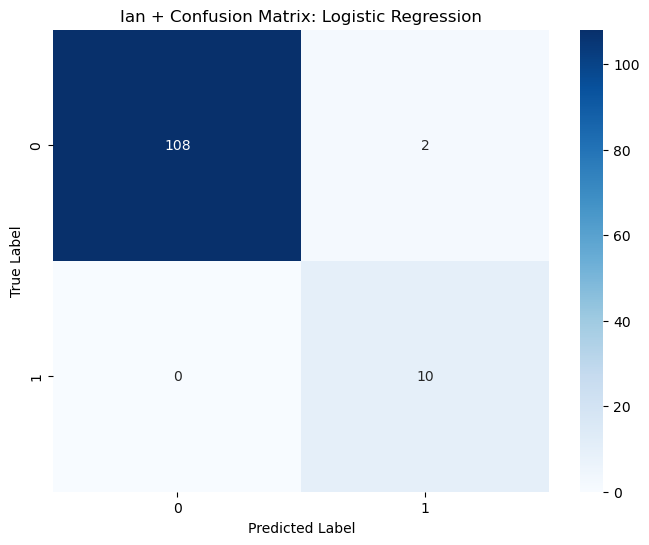

In [607]:
# plot Logistic Regression
from sklearn.metrics import confusion_matrix
import seaborn as sns
# Logistic Regression

# your code
cm_logistic = confusion_matrix(y_val, y_val_pred_logistic)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_logistic, annot=True, fmt="d", cmap="Blues")
plt.title("Ian + Confusion Matrix: Logistic Regression")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

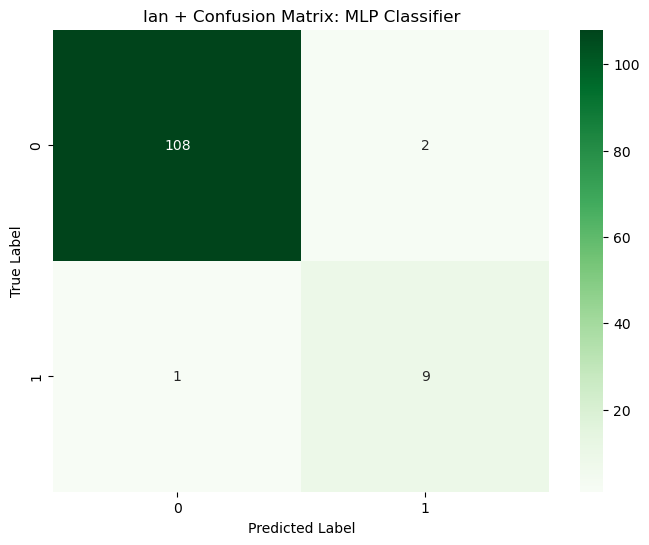

In [583]:
# plot MLP
# Your code
cm_mlp = confusion_matrix(y_val, y_val_pred_mlp)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_mlp, annot=True, fmt="d", cmap="Greens")
plt.title("Ian + Confusion Matrix: MLP Classifier")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


## Conclusion

[0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]
[0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0]


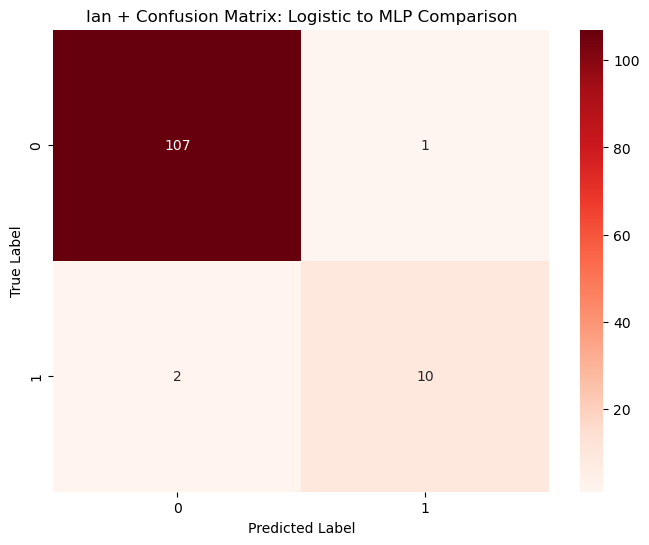

In [637]:
# Please compare the difference and common between Logistic results and MLP results
#Regarding the conclusion, please implement code that compares the logistic regression results with those of the MLP.
# Your idea :
# plot mathematical difference of LR - MLP
# Your code
cm_mlp = confusion_matrix(y_val_pred_logistic, y_val_pred_mlp)
print(y_val_pred_logistic)
print(y_val_pred_mlp)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_mlp, annot=True, fmt="d", cmap="Reds")
plt.title("Ian + Confusion Matrix: Logistic to MLP Comparison")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()



